In [3]:
print('3')

!pip install numpy pandas matplotlib scikit-learn scipy

3
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     ------------------- ------------------- 81.9/162.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
   -------------

In [14]:
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf

In [15]:
file_path='C:\\Users\\user\\Desktop\\Dream\\Ford\\'
train_fn='FordA_TRAIN.arff'
test_fn='FordA_TEST.arff'

In [17]:
save_path='C:\\Users\\user\\Desktop\\Dream\\Ford\\'

ARIFF(Attributed Relation File Format)은 주로 Weka 데이터 마이닝 소프트웨어에서 사용되는 파일 형식으로, 데이터 셋과 그 속성 정보를 담고 있다.

In [18]:
def read_ariff(path): # .ariff 파일을 읽어들여 그 내용을 numpy 배열로 변환하는 역할

    raw_data, meta= loadarff(path) #해당 경로의 .ariff 파일을 로드 
    #데이터와 메타데이터를 포함하는 튜플을 반환, raw_data는 실제 데이터를, meta는 데이터에 대한 메타정보(각 속성의 이름, 타입 등)
    
    cols = [x for x in meta] #메타데이터에서 속성의 이름을 추출하여 리스트로, 데이터의 각 열(column)에 해당하는 이름
    data2d = np.zeros([raw_data.shape[0],len(cols)])
    #데이터의 형태를 갖는 2차원 numpy 배열을 생성, 모든 값0으로 초기화 
    #행의 수: raw_data, 열의 수: cols 리스트 길이(메타데이터 안의 속성 수) 즉, 각 행은 하나의 데이터 포인트를, 각 열은 한 속성

    for I, col in zip(range(len(cols)), cols): # 모든 칼럼에 대하여 반복
        data2d[:,I]=raw_data[col]
        # raw_data에서 각 속성의 데이터를 추출하여 data2d 배열의 해당 열에 할당
        # I:열의 인덱스 , col: 속성의 이름 -> raw_data에 있는 데이터 numpy로 구조화
    
    return data2d # data2d 반환

#1.완전한 파일경로 생성  2. read_ariff함수로 .ariff 파일 로드 3.반환된 numpy 배열을 train과 test 변수에 할당
train=read_ariff(file_path+train_fn)
test=read_ariff(file_path+test_fn)

In [19]:
# train과 test 넘파이 배열의 형태를 튜플로 출력
print("train_set.shape", train.shape) #3601은 데이터 포인트(또는 샘플)의 수를, 501은 속성의 수
print("test_set.shape", test.shape)

train_set.shape (3601, 501)
test_set.shape (1320, 501)


In [20]:
#훈련 데이터 세트의 특성(독립 변수)
x_train_temp = train[:,:-1] #train 배열에서 모든 행(:)과 첫번째 열부터 마지막 열 전(:-1)까지 데이터 할당

#훈련 데이터 세트의 레이블(종속 변수)
y_train_temp= train[:,-1] #train 배열에서 모든 행(:)과 첫번째 열부터 마지막 열(-1)만 데이터 할당

#테스트 데이터 세트의 특성
x_test= test[:,:-1] #test 배열에서 모든 행(:)과 첫 번째 열부터 마지막 열 전(:-1)까지의 데이터 할당

#테스트 데이터 세트의 레이블
y_test= test[:,-1] # test 배열에서 모든 행(:)과 마지막 열(-1)만 할당

#arff 파일 또는 기타 데이터 세트에서 마지막 열은 레이블이나 타겟 변수로 사용
#레이블은 각 데이터 포인트가 어떤 범주에 속하는지 나타내는 값이며, 특성은 해당 데이터 포인트의 속성 또는 변수입니다. 이 분리 작업은 모델을 훈련시킬 때 필요한 입력값과 예측해야 할 출력값을 정의하기 위해 필수적

In [21]:
normal_x= x_train_temp[y_train_temp==1]# Train x 데이터 중 정상 데이터 abnormal_x = Xtrain_temply_traintemp==-11 # Train x 데이터 중 비정상 데이터 normal_y a Y_train_temply_train_temp==11 # Train-y 데이터 중 정상 데이터
abnormal_x= x_train_temp[y_train_temp==-1]
normal_y= y_train_temp[y_train_temp==1]# Train x 데이터 중 정상 데이터 abnormal_x = Xtrain_temply_traintemp==-11 # Train x 데이터 중 비정상 데이터 normal_y a Y_train_temply_train_temp==11 # Train-y 데이터 중 정상 데이터
abnormal_y= y_train_temp[y_train_temp==-1]
#Trainy 데이터 중 비정상 데이터
ind_x_normal =int(normal_x.shape[0]*0.8) # 정상 데이터를 8.2로 나누기 위한 기준 인덱스 설정 ind_y_normal aint(normal_y.shapel]*0.8) 정상 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_y_normal =int(normal_y.shape[0]*0.8) # 정상 데이터를 8.2로 나누기 위한 기준 인덱스 설정 ind_y_normal aint(normal_y.shapel]*0.8) 정상 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_x_abnormal =int(abnormal_x.shape[0]*0.8)
ind_y_abnormal =int(abnormal_y.shape[0]*0.8) # 비정상 데이터를 82로 나누기 위한 기준 인덱스 설정

x_train = np.concatenate((normal_x[:ind_x_normal], abnormal_x[:ind_x_abnormal]), axis=0)
x_valid = np.concatenate((normal_x[ind_x_normal:], abnormal_x[ind_x_abnormal:]), axis =0)
y_train = np.concatenate((normal_y[:ind_y_normal], abnormal_y[:ind_y_abnormal]), axis=0)
y_valid = np.concatenate((normal_y[ind_y_normal:], abnormal_y[ind_y_abnormal:]), axis=0)

In [22]:
print("x_train.shape:", x_train.shape)
print("x_valid.shape:", x_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("x_test.shape:", y_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (2880, 500)
x_valid.shape: (721, 500)
y_train.shape: (2880,)
y_valid.shape: (721,)
x_test.shape: (1320,)
y_test.shape: (1320,)


2. 데이터 시각화

2-1. 데이터 불균형(Dara Imbalance) 확인

출력 결과 정상 label 데이터 수와 비정상 label 데이터 수가 비교적 균형적

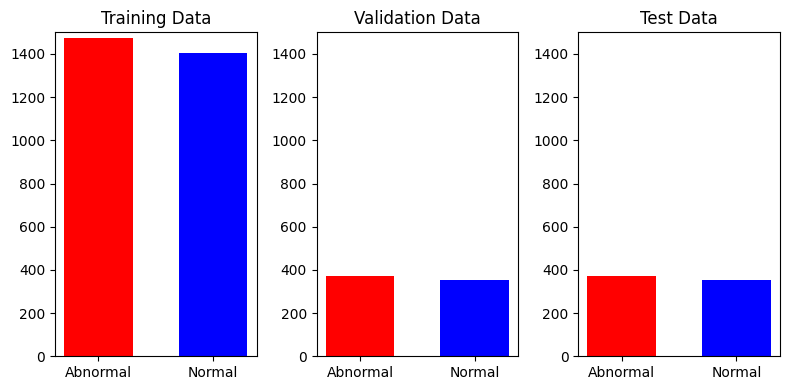

In [23]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

x= np.arange(len(classes))
labels = ["Abnormal", "Normal"]

values_train = [(y_train == i).sum() for i in classes]
values_valid = [(y_valid == i).sum() for i in classes]
values_test= [(y_test == i).sum() for i in classes]

plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
plt.title("Training Data")
plt.bar(x, values_train, width=0.6, color=["red", "blue"])
plt.ylim([0,1500])
plt.xticks(x, labels)

plt.subplot(1,3,2)
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6, color=["red", "blue"])
plt.ylim([0,1500])
plt.xticks(x,labels)

plt.subplot(1,3,3)
plt.title("Test Data")
plt.bar(x, values_valid, width=0.6, color=["red", "blue"])
plt.ylim([0,1500])
plt.xticks(x,labels)

plt.tight_layout()
plt.savefig('C:\\Users\\user\\Desktop\\Dream\\Ford\\plt\\' + 'data_imbalance.png', dpi=100, bbox_inches='tight')
plt.show()

2-2. 특정 시간에서의 시계열 샘플을 플롯

 특정 시간대(tn)에서 500개의 센서로 측정한 계측 값들로 구성
  무작위의 시간대로 선택한 정상과 비정상 간의 센서 값의 분포 차이

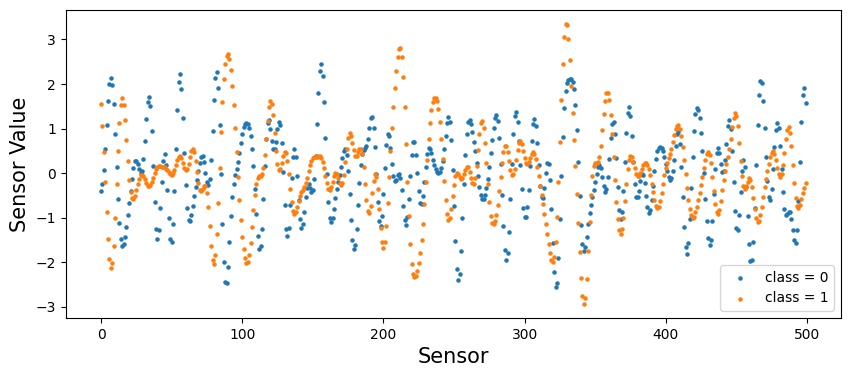

In [24]:
import random 

labels= np.unique(np.concatenate((y_train, y_test), axis=0)) # labels (-1 or 1)

plt.figure(figsize= (10,4))

for c in labels:
    c_x_train = x_train[y_train == c]
    if c ==-1: c = c+1 # 편의상 Abnormal Class(-1)를 0으로 조정
    time_t = random.randint(0,c_x_train.shape[0]) #0~1404 사이의 랜덤한 정수가 특정 time t가 됨
    plt.scatter(range(0,500), c_x_train[time_t], label="class = "+str(int(c)), marker='o',s=5)

plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.savefig(save_path + 'ford_data_ts_sample1.png', dpi=100, bbox_inches='tight')
plt.show()

2-3. 특정 시간에서의 시계열 샘플을 플롯
    (정상과 비정상 샘플을 각각 출력)

t=403(비정상), t=964(정상) 시점에서 500개 센서가 측정한 계측 값
산점도로 출력

비정상 Label 데이터 수 : 1476


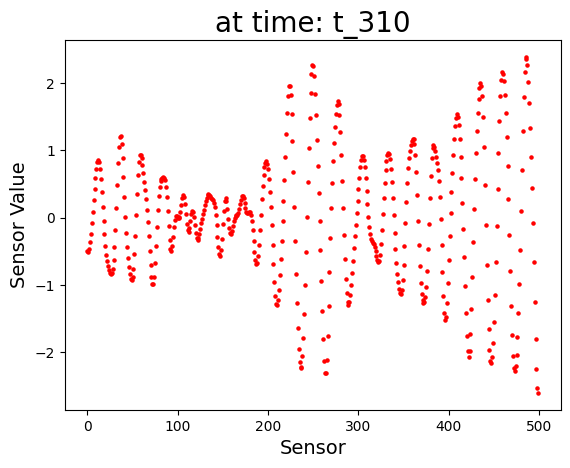

정상 Label 데이터 수 : 1404


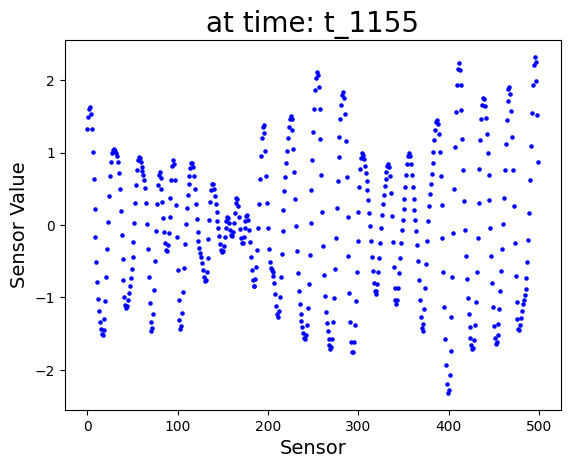

In [25]:
def get_scatter_plot(c):
    time_t = random.randint(0, c_x_train.shape[0]) #0~1404 사이의 랜덤한 정수 특정 time t가 됨
    plt.scatter(range(0, c_x_train.shape[1]), c_x_train[time_t],
                marker='o', s=5, c="r" if c==-1 else "b")
    plt.title("at time: t_{}".format(time_t), fontsize=20)
    plt.xlabel("Sensor", fontsize=14)
    plt.ylabel("Sensor Value", fontsize=14)
    plt.savefig('save_path' +'{state}.png'.format(state="abnormal"if c ==-1 else "normal"),
                dpi=100, bbox_inches="tight")
    plt.show()

labels = np.unique(np.concatenate((y_train, y_test), axis=0))

for c in labels:
    c_x_train= x_train[y_train==c]
    if c ==-1:
        print("비정상 Label 데이터 수 :", len(c_x_train))
        get_scatter_plot(c)
    else:
        print("정상 Label 데이터 수 :", len(c_x_train))
        get_scatter_plot(c)


2-4. 1개의 임의의 센서 값의 시계열을 플롯

시간에 따른 데이터의 흐름 확인을 위함 + 이상치 탐색
랜덤 숫자 217 센서의 시계열 플롯
이상치가 많이 보이지 않음

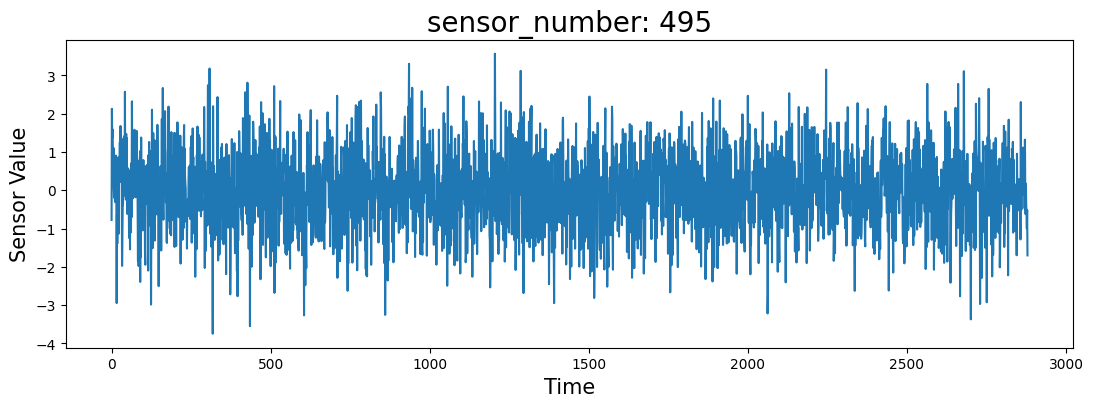

In [26]:
sensor_number = random.randint(0,500) #0~500 사이의 랜덤한 정수가 Sensoe 번호가 됨
plt.figure(figsize=(13,4))
plt.title("sensor_number: {}".format(sensor_number),fontsize=20)
plt.plot(x_train[:, sensor_number])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.savefig(save_path+'ford_a_sensor.png', dpi=100, bbox_inches = 'tight')

3. 데이터 특성 파악

상관관계 분석
상관성이 1에 가까울 수록 양의 상관성이 높고, -1에 가까울 수록 음의 상관성이 높다.
상관성이 서로 높은 변수들만 선택할 경우 의종성이 높아지는 문제(오버 피팅)이 발생할 수 있기에 상관성이 높은 변수들을 그룹화하고 그룹별로 대표적인 변수를 선택해야 함

센서 번호가 가까울수록 상관성이 높다.
거리가 멀어질수록 상관성 줄어든다. 
>>Local한 특징(근처 센서 간의 관계) 학습하는 CNN이 좋은 성능을 볼일거라 예상 가능

C:\Users\user\AppData\Local\Temp\ipykernel_22648\3993820606.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap("jet",31)


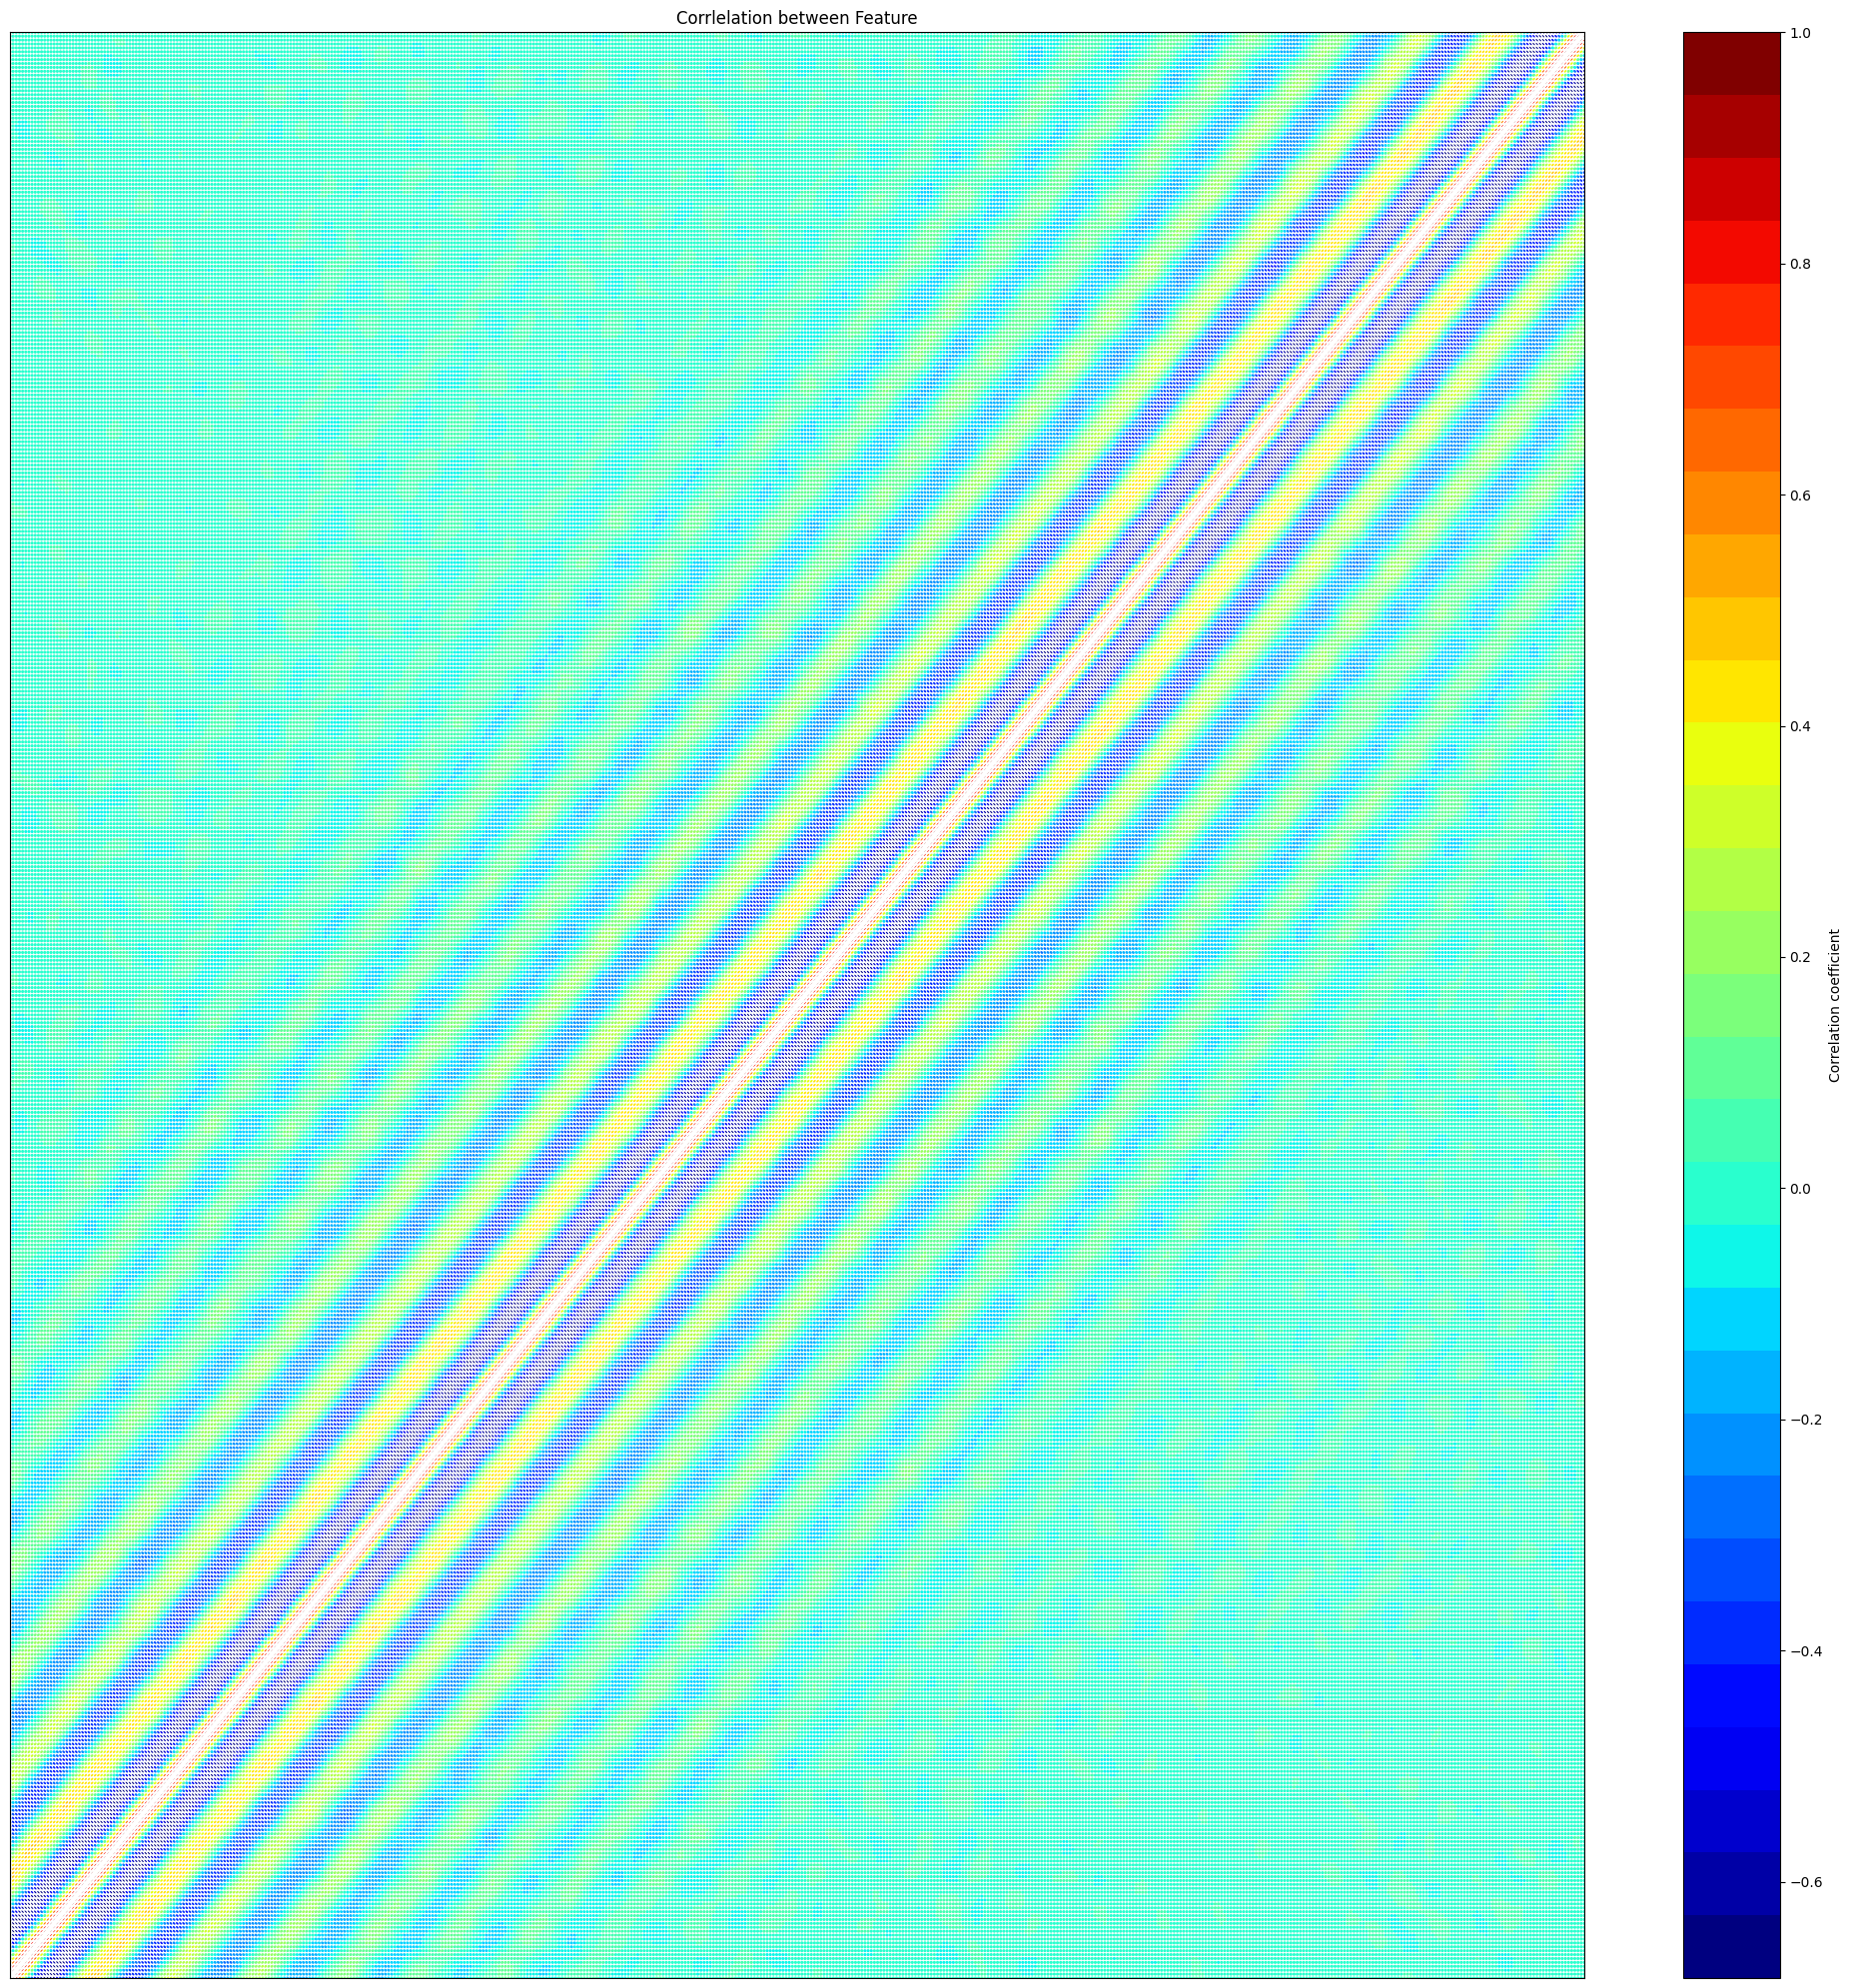

In [27]:
import matplotlib.cm as cm
from matplotlib.collections import EllipseCollection

df = pd.DataFrame(data = x_train,
                  columns=["sensor_{}".format(label+1) for label in range(x_train.shape[1])])
data = df.corr()

def plot_corr_ellipses(data, ax = None, **kwargs):

    M = np.array(data)
    if not M.ndim ==2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] -0.5)
        ax.set_ylim(-0.5, M.shape[0] -0.5)

    xy = np.indices(M.shape)[::-1].reshape(2,-1).T

    w= np.ones_like(M).ravel()
    h= 1 - np.abs(M).ravel()
    a= 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    
    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
    return ec


fig, ax = plt.subplots(1, 1, figsize=(20,20))
cmap= cm.get_cmap("jet",31)
m= plot_corr_ellipses(data, ax=ax, cmap=cmap)
cb = fig.colorbar(m)
cb.set_label("Correlation coefficient")
plt.title("Corrlelation between Feature")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig(save_path+ 'corr.png', dpi=100, bbox_inches='tight')
plt.show()

4. 데이터 정규화

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Srandard Scaler를 적용하고 싶은 경우 

stder =StandardScaler()
stder.fit(x_train)
x_train=stder.transform(x_train)
x_valid = stder.transform(x_valid)

#Robust Scaler를 적용하고 싶은 경우
# rscaler=RobustScaler()
# rscaler.fit(x_train)
# x_train= rscaler.transform(x_train)
# x_valid= rscaler.trandform(x_valid)

데이터 형태 변환
CNN, RNN 모델에 대해서 해당함

-텐서의 형태를 2D에서 3D로 바꿔준 입력 인풋 사용
-시계열 데이터가 다변량(Multivariante), 1개의 채널(Channel)만 갖는 특성
>>그래서 데이터 형태를 바꿔줌

기존 (N,500) 형태에서 (N,500,1)형태로 1개의 차원(채널 축) 증가

- 즉, 500개의 센서가 신경망 모델의 각 노드에 매칭이 된다면, 각 노드에서 
Feature(본 데이터 셋에서는 센서의 측정 값 1게)의 개수가 채널 개수와 매칭된다고 
볼 수 있다

In [29]:
##CNN, RNN 모델의 입력 변수는 채널 축 1개 차원을 확장시킨 3D Tensor이다.
# 아래 CNN,RNN 모델은 x_train, x_valid, x_test를 입력 변수로 넣지 않고 
#x_train_exp, x_valid_exp, x_test_exp를 넣는다.

x_train_exp = np.expand_dims(x_train, -1)
x_valid_exp = np. expand_dims(x_valid, -1)
x_test_exp = np. expand_dims(x_test, -1)

#동일한 코드
#x_trian_exp = x_trian.reshape((x_train[0], x_trian.shape[1],1))
#x_valid_exp = x_train.reshape((x_valid[0], x_valid.shape[1],1))
#x_test_exp = x_test.reshape((x_test[0], x_test.shape[1],1))

print("x_train_exp의 형태", x_train_exp.shape)
print("x_valid_exp의 형태", x_valid_exp.shape)
print("x_test_exp의 형태", x_test_exp.shape)

x_train_exp의 형태 (2880, 500, 1)
x_valid_exp의 형태 (721, 500, 1)
x_test_exp의 형태 (1320, 500, 1)


종속 변수(y)를 양의 값으로 변경
모델 학습을 위해 종속 변수인 Label(비정상:-1, 정상:1) 값을 양의 값으로 바꿔준다.

In [30]:
y_train[y_train == -1] =0
y_valid[y_valid == -1] =0
y_test[y_test == -1] =0

5. 모델 구축 및 설계

XGBoost Classifier 모델 구축

In [12]:
from xgboost import XGBClassifier

#반드시 튜닝해야할 파라미터는 min_child_weight / max_depth / gamma

xgb= XGBClassifier(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=5,
    min_child_weight=3,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=1.0,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

XGBoost 모델 학습

(1) GridSearch를 통한 초모수 튜닝

직접 지정해준 몇 가지 잠재적 Parameter들의 후보군들의 모든 조합에서 모델의 성능이 가장 좋은 조합을 찾는 방법

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.1, 0.01, 0.001, 0.0001],
     # "eta": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
     "max_depth" :[3, 4, 5,6,8, 10, 12, 15],
     "min_child_weight": [1,3,5,7],
     "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
     "colsample_bytree": [0.3, 0.4, 0.5, 0.7]

}

grid =GridSearchCV(xgb,
                   parameters, n_jobs=4,
                   scoring="neg_log_loss",
                   cv=5)

grid.fit(
    x_train.squeeze(),
    y_train,
    eval_metric="auc",
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    verbose=True
)



KeyboardInterrupt: 

In [ ]:
print('Start Training')

xgb.fit(
    x_train,
    y_train,
    eval_metric=['auc', 'error'],
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    verbose=True
)

print('End of Training')

모델평가 

XGBoost 평가

-정확도, AUC, F1 Score 측정

In [ ]:
y_pred = xgb.predict(x_test)
y_pred_proba= xgb.predict_proba(x_test)[:,1]

print("\nAbout the present model")
print("Accuracy : %4g" % accuracy_score(y_test, y_pred))
print("AUC Score (training set): %f" % roc_auc_score(y_test, y_pred_proba))
print("F1 Score (training set): %f" % f1_score(y_test, y_pred))

결과분석 및 해석

(1) 혼동 행렬

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

def draw_confusion_matrix(model, xt, yt, model_name):
    Y_pred = model.predict(xt)

    if model_name in["cnn","rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred

    plt.figure(figsize=(3,3))
    cm= confusion_matrix(yt, y_pred)
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks,['False','True'], rotation=45)
    plt.yticks(tick_marks, ['False','True'])
    thresh = cm.max()/1.2
    normalize=False
    fmt='2.f' if normalize else 'd'
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment="center",
        color="white" if cm[i,j]> thresh else "black",
        fontsize=12)

    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.savefig(save_path+'{}_cm.png'.format(model_name), dpi=100, bbox_inches='tight')
    plt.show()

    print(classification_report(yt, y_pred))


성능은 거의 비슷하다

In [ ]:
draw_confusion_matrix(xgb, x_test, y_test, "xgboost")

(2) ROC Curve

x축(1 - specificity = FPR(False Positive Rate)): 가짜 중에 진짜를 찾은 비율(가짜 중에 잘못 예측한 비율), 

y축(Sensitivity): 진짜 중에 진짜를 찾은 비율(진짜 중에 진짜를 잘 찾은 비율)

실제로 진짜일 경우 > 실제로 가짜일 경우 : AUC 높음

점선: 랜덤으로 예측한것과 마찬가지-> 성능 가장 나쁜 경우

곡선: 왼쪽 위로 굽어지면 굽어질수록 AUC가 넓어지므로 더욱 정확한 모델 

ROC Curve가 점선 밑으로 그려져 있음-> 해당 데이터에 대해 좋은 모델은 아님

numpy 모델이 area 넓이가 조금 더 크다-> sklearn보다 조금 더 나은 모델

In [39]:
from sklearn.metrics import roc_curve, auc 

def draw_roc(model, xt, yt, model_name):
    Y_pred=model.predict(xt)

    if model_name in ["cnn","rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred

    fpr, tpr, thr = roc_curve(yt, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area= %0.2f)' %roc_auc)
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating chatacterisic {},".format(model_name))
    plt.legend(loc="lower right")
    plt.ion()
    plt.tight_layout()
    plt.savefig(save_path +'{}_roc.png'.format(model_name), dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
draw_roc(xgb,x_test, y_test, "xgboost")

(3) Epoch에 따른 학습&검증의 손실(loss) 그래프

validation 데이터셋을 통해 학습과정 중 validation을 진행하는 절차가 없기에 Training Loss 추이만 그려볼 수 있다.

In [41]:
def plot_loss_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Training & Validation Loss")
    plt.ylabel("loss", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path+'{}.png'.format(pic_name), dpi=100, bbox_inches='tight')

(4)Epoch에 따른 정확도(Accuracy Rate) 그래프

In [1]:
def plot_prediction_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_"+"sparse_categorical_accuracy"])
    plt.title("model"+"Prediction Accuracy")
    plt.ylabel("sparse_categorical_accuracy", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(save_path+'{}.png'.format(pic_name), dpi=100, bbox_inches='tight')
    plt.show()